In [1]:
import pandas as pd
import numpy as np

In [21]:
filter_names = ["EXPANDED DSM", "SIMPLE DSM",
                    "MC DSM", "SEMANTIC AE", "LSTM ENSEMBLE AE",
                    "SIMPLE LSTM AE", "MC SS", "SIMPLE SS",
                    "SIMPLE LE", "SMOOTH LE", "HIGH ENTROPY LE"]

task_names = [
    "AG_News",
    "DBPedia",
    "FNC1",
    "IMDB",
    "QNLI",
    "Rotten_Tomatoes",
    "SST2",
    #"trec-coarse",
    "trec",
    "Wiki_Talk",
]
version = "y"
ds_names = [version+t for t in task_names]

data = []
for ds_name in ds_names:
    for seed in range(42,52):
        a = np.load(f"Results/{ds_name}_{seed}.npy") 
        data.append(a)

results = np.concatenate(data, axis=1)
print(results.shape)
a

(11, 44525)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False,  True],
       [False, False, False, ..., False, False, False]])

In [22]:
data = {}
for i, filter_name in enumerate(filter_names):
    data[filter_name] = np.argwhere(results[i])
    
def jaccard_similarity(set1, set2):
    intersection = np.intersect1d(set1, set2)
    union = np.union1d(set1, set2)
    if len(union) == 0:
        return 0
    return len(intersection) / len(union)

def dice(set1, set2):
    intersection = np.intersect1d(set1, set2)
    return len(intersection) * 2 / (len(set1)+len(set2))

def overlap_coefficient(set1, set2):
    intersection = np.intersect1d(set1, set2)
    if len(intersection) == 0 and min(len(set1),len(set2)) == 0:
        return 0
    return len(intersection) / min(len(set1),len(set2))
    


data[filter_names[0]]

array([[  131],
       [  134],
       [  135],
       ...,
       [44312],
       [44324],
       [44326]], dtype=int64)

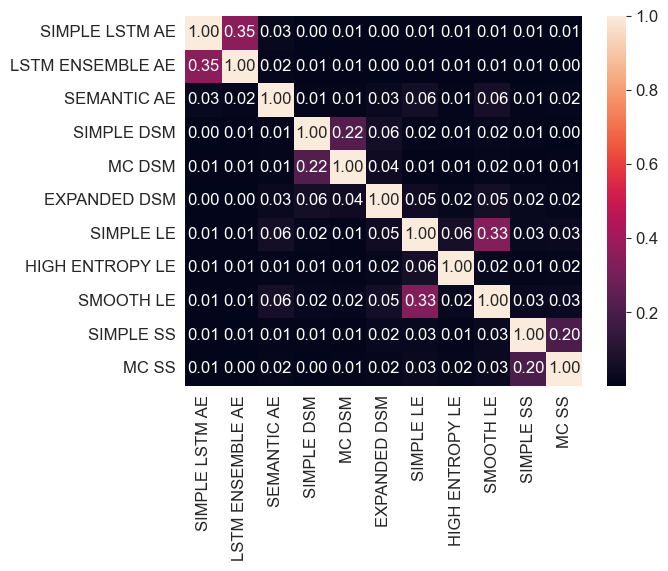

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize an empty matrix for storing Jaccard coefficients
n = len(data)
jaccard_matrix = np.zeros((n, n))

keys = [
    "SIMPLE LSTM AE",
    "LSTM ENSEMBLE AE",
    "SEMANTIC AE",
    "SIMPLE DSM",
    "MC DSM",
    "EXPANDED DSM", 
    "SIMPLE LE",
    "HIGH ENTROPY LE",
    "SMOOTH LE", 
    "SIMPLE SS",
    "MC SS",
]
#keys = list(data.keys())

for i in range(n):
    for j in range(n):
        jaccard_matrix[i, j] = jaccard_similarity(data[keys[i]], data[keys[j]])

# Using seaborn for a nicer heatmap
sns.heatmap(jaccard_matrix, annot=True, fmt=".2f", xticklabels=keys, yticklabels=keys)
plt.rcParams.update({'font.size': 12})
#plt.title('Jaccard Coefficients Heatmap (All Datasets)')
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.savefig("Jaccard-all.pdf", bbox_inches='tight')
plt.show()

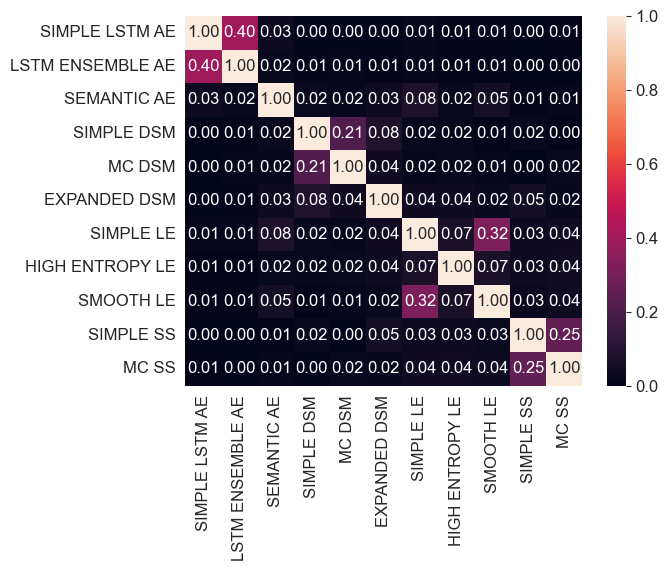

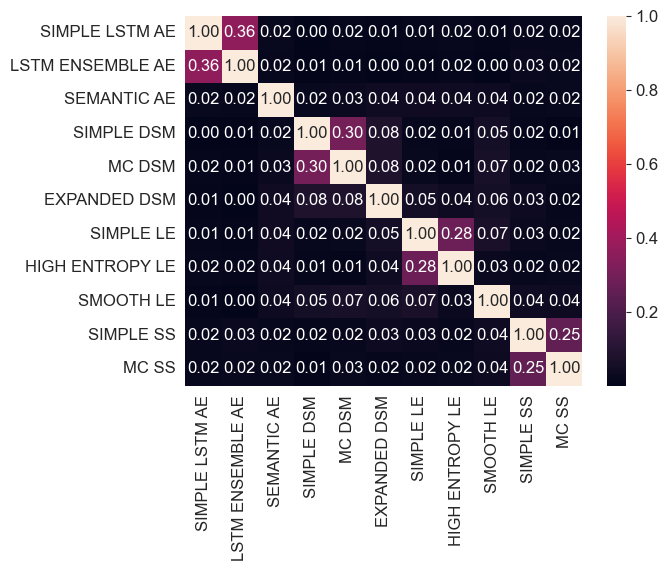

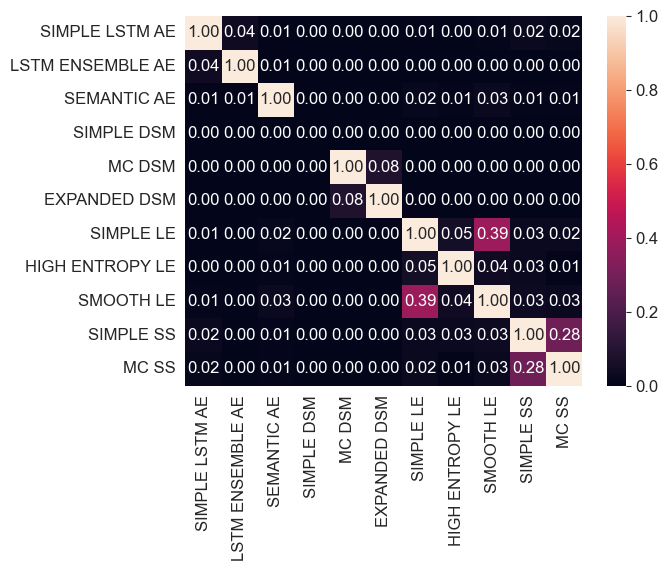

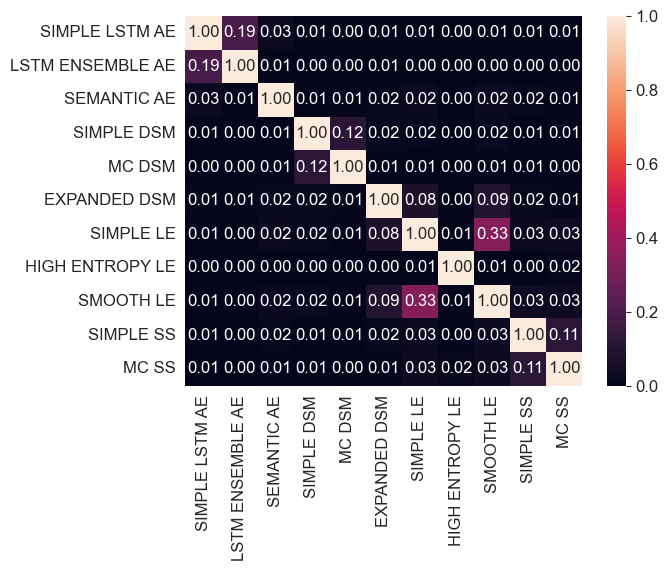

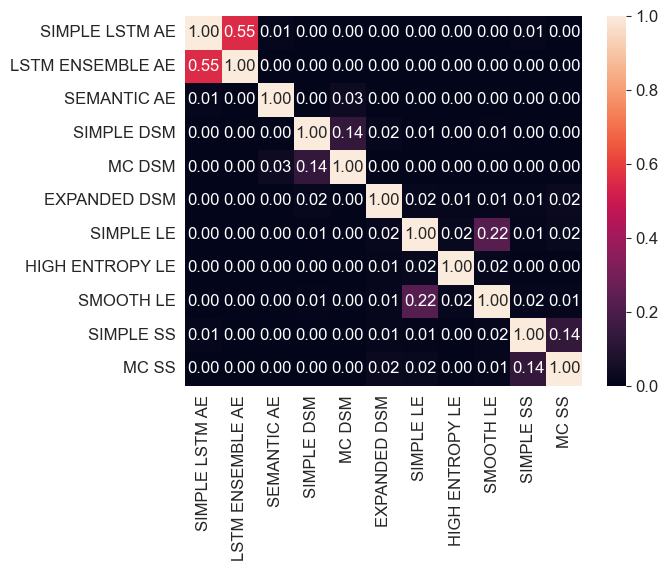

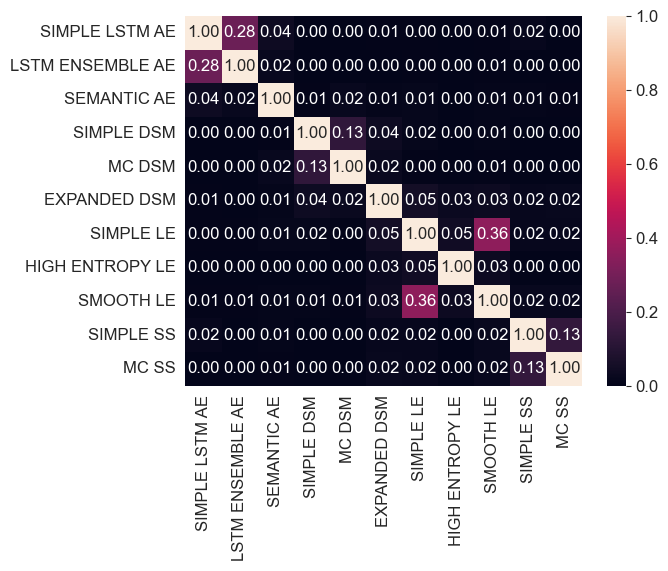

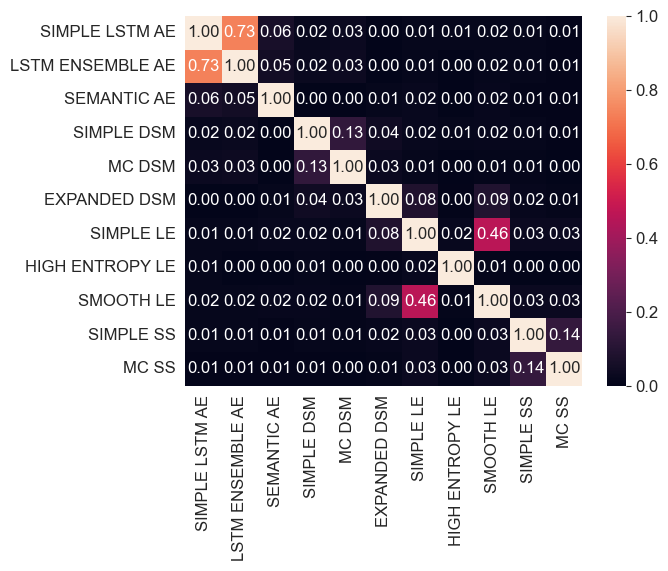

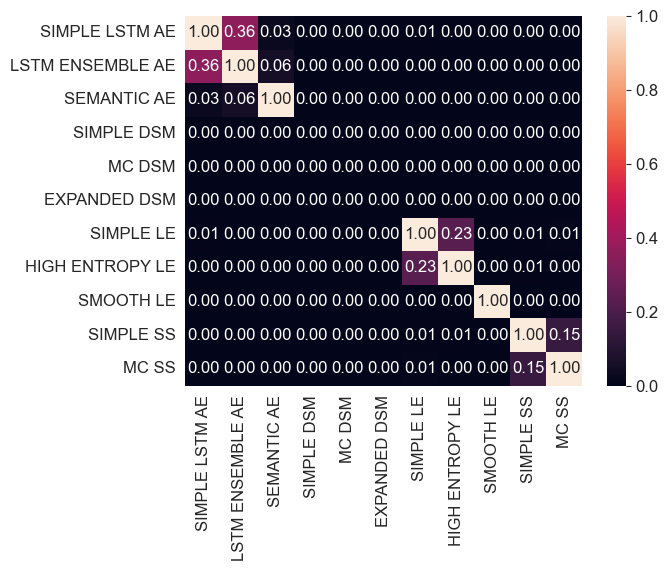

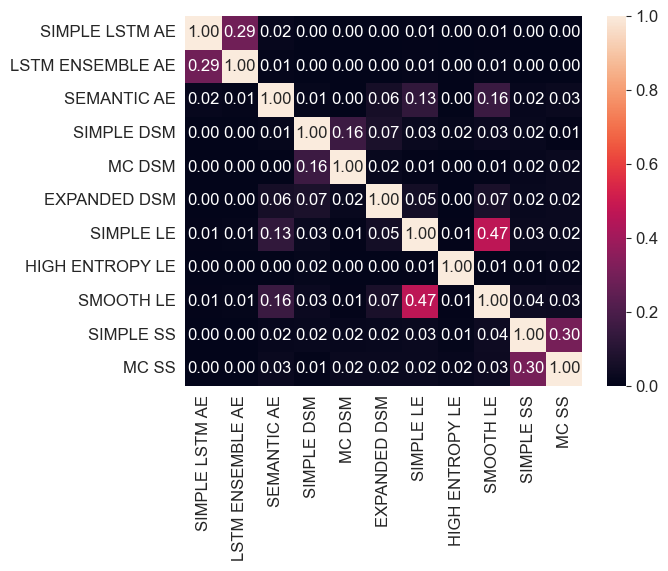

In [27]:
for ds_name in ds_names:
    data = []
    for seed in range(42,52):
        a = np.load(f"Results/{ds_name}_{seed}.npy") 
        data.append(a)
    results = np.concatenate(data, axis=1)
    data = {}
    for i, filter_name in enumerate(filter_names):
        data[filter_name] = np.argwhere(results[i])
    n = len(data)
    jaccard_matrix = np.zeros((n, n))
    
    #keys = list(data.keys())
    
    for i in range(n):
        for j in range(n):
            jaccard_matrix[i, j] = jaccard_similarity(data[keys[i]], data[keys[j]])
    
    # Using seaborn for a nicer heatmap
    sns.heatmap(jaccard_matrix, annot=True, fmt=".2f", xticklabels=keys, yticklabels=keys)
    plt.rcParams.update({'font.size': 12})
    #plt.title('Jaccard Coefficients Heatmap (All Datasets)')
    #plt.xticks(fontsize=18)
    #plt.yticks(fontsize=18)
    plt.savefig(f"Jaccard-{ds_name}.pdf", bbox_inches='tight')
    plt.show()